In [22]:
import csv
import os
import pandas as pd

def load_data(csv_path):
    return pd.read_csv(csv_path)
    
pm = load_data('polizeimeldungen.csv')

pm.head()
    

,datetime,location,description,details_link
0,28.02.2021 14:28 Uhr,Ereignisort: Lichtenberg,Bei Messerangriff schwer verletzt,https://www.berlin.de/polizei/polizeimeldungen...
1,28.02.2021 14:26 Uhr,Ereignisort: Mitte,Einsatzwagen stößt mit Straßenbahn zusammen,https://www.berlin.de/polizei/polizeimeldungen...
2,28.02.2021 12:21 Uhr,Ereignisort: Charlottenburg-Wilmersdorf,Party in Drei-Zimmer-Wohnung,https://www.berlin.de/polizei/polizeimeldungen...
3,28.02.2021 12:17 Uhr,Ereignisort: Mitte,Festnahmen nach Raub,https://www.berlin.de/polizei/polizeimeldungen...
4,28.02.2021 12:15 Uhr,Ereignisort: Lichtenberg,Erneut nationalsozialistische Zeichen geschmiert,https://www.berlin.de/polizei/polizeimeldungen...


In [28]:
pm['location'] = pm['location'].apply(lambda l: str(l).replace('Ereignisort: ', '').replace(' ', '').lower())
pm.head(2000000)

,datetime,location,description,details_link
0,28.02.2021 14:28 Uhr,lichtenberg,Bei Messerangriff schwer verletzt,https://www.berlin.de/polizei/polizeimeldungen...
1,28.02.2021 14:26 Uhr,mitte,Einsatzwagen stößt mit Straßenbahn zusammen,https://www.berlin.de/polizei/polizeimeldungen...
2,28.02.2021 12:21 Uhr,charlottenburg-wilmersdorf,Party in Drei-Zimmer-Wohnung,https://www.berlin.de/polizei/polizeimeldungen...
3,28.02.2021 12:17 Uhr,mitte,Festnahmen nach Raub,https://www.berlin.de/polizei/polizeimeldungen...
4,28.02.2021 12:15 Uhr,lichtenberg,Erneut nationalsozialistische Zeichen geschmiert,https://www.berlin.de/polizei/polizeimeldungen...
...,...,...,...,...
15885,02.07.2014 13:43 Uhr,mitte,Raub Grünanlage Alexanderplatz (Nr. 1568),https://www.berlin.de/polizei/polizeimeldungen...
15886,01.07.2014 11:50 Uhr,friedrichshain-kreuzberg,Gefährlicher Körperverletzung Wiener Straße (N...,https://www.berlin.de/polizei/polizeimeldungen...
15887,16.06.2014 12:45 Uhr,reinickendorf,Toter in Laubenkolonie (Nr. 1434),https://www.berlin.de/polizei/polizeimeldungen...
15888,10.04.2014 11:05 Uhr,charlottenburg-wilmersdorf,Juwelier Berkaer Straße überfallen (Nr. 0862),https://www.berlin.de/polizei/polizeimeldungen...


In [29]:
# add date (i.e. no time column)
pm['date'] = pm['datetime'].apply(lambda dt: str(dt).split(' ')[0])

pm.head()

,datetime,location,description,details_link,date
0,28.02.2021 14:28 Uhr,lichtenberg,Bei Messerangriff schwer verletzt,https://www.berlin.de/polizei/polizeimeldungen...,28.02.2021
1,28.02.2021 14:26 Uhr,mitte,Einsatzwagen stößt mit Straßenbahn zusammen,https://www.berlin.de/polizei/polizeimeldungen...,28.02.2021
2,28.02.2021 12:21 Uhr,charlottenburg-wilmersdorf,Party in Drei-Zimmer-Wohnung,https://www.berlin.de/polizei/polizeimeldungen...,28.02.2021
3,28.02.2021 12:17 Uhr,mitte,Festnahmen nach Raub,https://www.berlin.de/polizei/polizeimeldungen...,28.02.2021
4,28.02.2021 12:15 Uhr,lichtenberg,Erneut nationalsozialistische Zeichen geschmiert,https://www.berlin.de/polizei/polizeimeldungen...,28.02.2021


In [36]:
# pm.describe()

pm['location'].value_counts()

mitte                         2459
friedrichshain-kreuzberg      1740
charlottenburg-wilmersdorf    1480
neukölln                      1406
tempelhof-schöneberg          1290
pankow                        1180
treptow-köpenick               963
reinickendorf                  848
lichtenberg                    836
spandau                        784
marzahn-hellersdorf            770
bezirksübergreifend            745
steglitz-zehlendorf            738
nan                            389
berlinweit                     226
bundesweit                      36
Name: location, dtype: int64

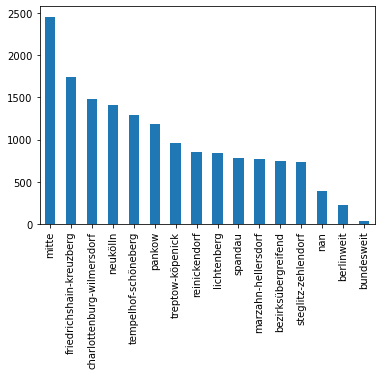

In [40]:
# %matplotlib inline
# import matplotlib.pyplot as plt

pm['location'].value_counts().plot(kind='bar')
# plt.show()